# https://clck.ru/JC6Ea

## Препроцессинг и определение языка / Preprocessing and language detection

Предыдущая часть была посвящена предобработке текстовых данных, теперь применим эти методы на практике и заодно узнаем, как можно решать задачу определения языка.

**Идеи?**

Нам понадобятся некоторые пакеты для Питона, установите себе недостающие:
* wikipedia
* nltk

In [1]:
!pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-cp36-none-any.whl size=11686 sha256=4e6843412b730a2622029e5d38490f50ba0c970dff8545106c4d6bce30d8c6c9
  Stored in directory: /root/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia


In [2]:
!pip install nltk

In [0]:
from collections import Counter  # нужно объяснять, что это?

import nltk
import wikipedia

Возможно, перед первым запуском `nltk` нужно скачать немного данных:

In [4]:
nltk.download("punkt")

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> punkt
      Unzipping tokenizers/punkt.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

Теперь посмотрим, как можно скачивать тексты из Википедии с помощью пакета `wikipedia`.

In [5]:
wikipedia.set_lang('ru')
page_name = wikipedia.random(1)
page = wikipedia.page(page_name)
print(page_name)
print(page.title)
print(page.content)

Генделевский фестиваль в Гёттингене
Генделевский фестиваль в Гёттингене
Генделевский фестиваль в Гёттингене (нем. Internationale Händel-Festspiele Göttingen) — ежегодный фестиваль старинной музыки в Гёттингене, посвящённый в первую очередь музыке Георга Фридриха Генделя. Программа фестиваля длится не менее двух дней, в один из которых ставится одна из опер Генделя, в другой проводится концерт с исполнением нескольких его ораторий наряду с так или иначе перекликающимися с ними сочинениями современников композитора.
Фестиваль был основан в 1920 году искусствоведом Оскаром Хагеном, по инициативе которого была впервые после почти двухсотлетнего перерыва поставлена опера Генделя «Роделинда». Под руководством Хагена в начале 1920-х гг. эстетика постановок была отмечена сильным влиянием экспрессионизма (первым сценографом фестиваля выступал Пауль Тирш), а музыка подвергалась значительным коррективам. Ранняя критика окрестила фестиваль «Генделевским Байройтом». После кризиса на рубеже десятиле

Поскольку мы будем выбирать из нескольких языков, лучше сразу завести функцию, которая будет 
скачивать нужное количество страниц для заданного языка.

In [0]:
TEST_LANGS = ('kk', 'ru', 'uk', 'be', 'fr')

In [0]:
def get_texts_for_lang(lang, n=10):
    wiki_content = []
    wikipedia.set_lang(lang)
    pages = wikipedia.random(n)
    for page_name in pages:
        try:
            page = wikipedia.page(page_name)
            wiki_content.append("%s\n%s" % (page.title, page.content.replace('=', '')))
        except wikipedia.exceptions.WikipediaException:
            print("Skip %s" % page_name)
    return wiki_content

In [8]:
wiki_texts = {}
for lang in TEST_LANGS:
    wiki_texts[lang] = get_texts_for_lang(lang, 50)
    print(lang, len(wiki_texts[lang]))

kk 50


/usr/local/lib/python3.6/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.6/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Skip Ясеновское сельское поселение
Skip Урбар
Skip Холмец
ru 47
Skip Норт-Адамс
Skip 1574 (значення)
Skip Архангельська сільська рада
Skip Мара (значення)
uk 46
Skip Макараўцы
Skip Паўлаўцы
Skip Карака (значэнні)
Skip Ян Сапега
be 46
fr 50


In [9]:
print(wiki_texts['kk'][0])
print(wiki_texts['fr'][0])

Барақ (ит)
Барақ - асыл текті ит тұқымының бейнелі атауы. Ілкі дәуірлерге тән археологиялық қазбаларда итті адам мүрдесінің жанына жерлегені мәлім. Бұл итті жеті қазынаға жатқызатын наным-сенімнің көне бастауы болса керек. Ежелгі түсінікте барақ пен бөрінің жігі ажыратыла бермеген, екеуі де тотемдік ұғыммен байланысты болғандықтан, көне рәміздерде, нышандық белгілерде ит-қасқыр бейнелері түркі-моңғол халықтарында кеңінен көрініс тапқан. Мәселен, «Моңғолдың құпия шежіресінде» Шыңғысханның арғы анасы Алунғуаның жатырына түнде шаңырақтан сары нұр түсіп, ол таң бозаландағанда есіктен сары ит түрінде сағымданып шығып кеткендігі,содан ананың жүкті болып қалғаны айтылады. Сонымен бірге, қырғыз халқының арғы тегі қыз бен қызыл иттің жұптасуынан таралған деген аңыз бар. Түркі халықтары балаларына барақ деген атты көп қойған. Батырларын Бараққа теңеген. Дүрегей деген ит тұқымының еркегі барақ деп аталатыны жөнінде де біршама деректер сақталған.


 Дереккөздер 
Thomas Ulmer
Thomas Ulmer est un dé

**Идея 1**

Можно найти самые частотные слова для каждого языка, а потом считать их количество в каждом новом тексте.

In [0]:
def collect_freqlist(wiki_pages, max_len=100):
    freqlist = Counter()
    # не забудем про токенизацию - nltk.word_tokenize
    for text in wiki_pages:
        for word in nltk.word_tokenize(text.lower()):
            if word.isalpha():
                freqlist[word] += 1
    return dict(freqlist.most_common(max_len))

In [22]:
# проверка
collect_freqlist(wiki_texts['ru'])

{'isbn': 21,
 'me': 18,
 'the': 39,
 'а': 74,
 'альбом': 31,
 'англ': 18,
 'был': 97,
 'была': 35,
 'были': 43,
 'было': 40,
 'в': 1055,
 'вместе': 16,
 'во': 34,
 'время': 34,
 'где': 26,
 'год': 19,
 'года': 192,
 'годах': 18,
 'году': 106,
 'два': 17,
 'движения': 29,
 'деревня': 29,
 'деятельность': 18,
 'для': 60,
 'до': 57,
 'его': 97,
 'её': 19,
 'же': 22,
 'жизни': 16,
 'за': 77,
 'и': 643,
 'из': 131,
 'или': 27,
 'им': 20,
 'имени': 19,
 'искусства': 16,
 'истории': 23,
 'история': 21,
 'их': 19,
 'к': 106,
 'как': 82,
 'км': 29,
 'константин': 17,
 'которого': 17,
 'которые': 16,
 'который': 21,
 'которых': 20,
 'культуры': 19,
 'магнитудой': 20,
 'марта': 19,
 'михаила': 19,
 'москве': 16,
 'на': 350,
 'не': 106,
 'несколько': 16,
 'николас': 16,
 'но': 35,
 'нод': 62,
 'о': 55,
 'области': 26,
 'однако': 27,
 'около': 18,
 'он': 71,
 'от': 88,
 'по': 197,
 'под': 31,
 'получил': 16,
 'после': 46,
 'при': 37,
 'примечания': 34,
 'пушкина': 26,
 'режиссёр': 28,
 'реки': 27,


In [0]:
freq_lists = {}
for lang in TEST_LANGS:
    freq_lists[lang] = collect_freqlist(wiki_texts[lang])

Теперь всё готово, чтобы сделать первую определялку языка!

In [0]:
def simple_lang_detect(freq_lists, text):
    counts = Counter()
    for lang, freq_list in freq_lists.items():
        freq_list = Counter(freq_list)
        for word in nltk.word_tokenize(text):
            counts[lang] += int(freq_list[word] > 0)
    return counts.most_common()

In [25]:
test_texts = get_texts_for_lang('fr')[0]
print(test_texts)

/usr/local/lib/python3.6/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.6/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Skip Głogówko
Rovescala
Rovescala est une commune italienne de la province de Pavie dans la région Lombardie en Italie.


 Administration 


 Hameaux 


 Communes limitrophes 
Castel San Giovanni, Montù Beccaria, San Damiano al Colle, Santa Maria della Versa, Ziano Piacentino


 Notes et références 

 Portail de la Lombardie


In [26]:
simple_lang_detect(freq_lists, test_texts)

[('fr', 12), ('kk', 3), ('ru', 0), ('uk', 0), ('be', 0)]

Попробуем оценить качество нашей определялки. Для этого установим `sklearn`, если его ещё нет, и возьмем оттуда функцию для подсчёта accuracy.

In [27]:
!pip install sklearn

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
def test_simple_lang_detect(freq_lists, test_size):
    results = []  # сюда будем писать результаты
    gold = []     # сюда будем писать исходный язык
    for lang in TEST_LANGS:
        for text in get_texts_for_lang(lang, test_size):
            predicted_lang = simple_lang_detect(freq_lists, text)[0][0]
            results.append(predicted_lang)
            gold.append(lang)
    print("RESULTS:")
    print("%d languages" % len(TEST_LANGS))
    print("Test size: %d texts per language" % test_size)
    print("Accuracy: %.4f" % accuracy_score(results, gold))

In [33]:
# проверка
test_simple_lang_detect(freq_lists, 10)

Skip Виноградовское сельское поселение (Приморский край)


/usr/local/lib/python3.6/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.6/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Skip Сайра
Skip Вячорка
RESULTS:
5 languages
Test size: 10 texts per language
Accuracy: 0.9574


## Машинное обучение

Будем говорить о **supervised** методах (обучение с учителем):

* У нас есть пары `(признаки, класс)`
* Классификатор обучается на них — подбирает подходящую функцию отображения признаков в множество классов
* После этого можно применять полученную модель для предсказаний на новых данных

Признаки могут быть разные:
* средняя длина слова
* минимальная длина слова
* максимальная длина слова
* …

Для определения языка часто используют не слова, а последовательности символов (символьные энграммы / character ngrams). Например, 3-граммы:
```
сим, имв, мво, вол, оло, лов
```

Из обучающих данных соберем словарь символьных энграмм $V$. 
Тогда каждый текст сможем представить в виде вектора длины $|V|$, где каждый признак показывает, присутствует ли соответствующая энграмма в тексте. Если эти значения будут просто $0$/$1$, то не учитывается "важность" последовательности для языка.

Будем использовать $tf \cdot idf$:

$tf \cdot idf (n, d) = \frac{count(n_d)}{\sum_{w \in d}count(w)} \cdot log\frac{|D|}{|\{d \in D | n \in d\}|}$

где $n$ - энграмма, $d$ - документ, а $D$ - весь корпус (на данном языке)

In [34]:
from sklearn import feature_extraction

vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range=(1, 5), analyzer='char')
vectorizer.fit(wiki_texts['ru'])
for item in vectorizer.get_feature_names()[:100]:
    print(item)




.

. 

. д

. дл

1

11

11 

11 д

12

12 

12 м

19

196

1963

1964

1965

1966

1968

1969

197

1970

1971

1972

1973

1974

1975

1976

1978

198

1980

1984

1985

199

1995

1996

1997

1998

1999

2

20

20 

20 и

200

2001

2002

2003

2004

2005

2006

2007

2008

2009

201

2010

2011

2012

2013

2014

2015

2016

2017

2018

2019

25

25-

25-л

26

26 

26 и

4

4 

4 м

4 ма

46

46-

46-й

8

8 

8 ф

8 фе

9

9 

9 а

9 ап

9 н

9 но

a

al

all

all 

b

be

bet

bett

c

c 

c 1

c 1 

cg


In [35]:
print(vectorizer.transform(wiki_texts['ru'])[0])  # первый документ в векторном представлении

  (0, 128664)	0.0007484019916797908
  (0, 128663)	0.0007484019916797908
  (0, 128662)	0.0007484019916797908
  (0, 128661)	0.0007484019916797908
  (0, 128650)	0.0007484019916797908
  (0, 128649)	0.0007484019916797908
  (0, 128648)	0.0007484019916797908
  (0, 128636)	0.0005516109357697634
  (0, 128631)	0.0010479967928373186
  (0, 128630)	0.0007484019916797908
  (0, 128629)	0.0007484019916797908
  (0, 128628)	0.0007484019916797908
  (0, 128627)	0.0007484019916797908
  (0, 128622)	0.0007484019916797908
  (0, 128621)	0.0007484019916797908
  (0, 128620)	0.0007484019916797908
  (0, 128616)	0.0006757722681801439
  (0, 128600)	0.0007484019916797908
  (0, 128599)	0.0007484019916797908
  (0, 128596)	0.0006757722681801439
  (0, 128592)	0.0006242406592694103
  (0, 128588)	0.0007484019916797908
  (0, 128587)	0.0007484019916797908
  (0, 128586)	0.0007484019916797908
  (0, 128585)	0.0006757722681801439
  :	:
  (0, 154)	0.0007484019916797908
  (0, 153)	0.0007484019916797908
  (0, 152)	0.000675772268180

In [36]:
!pip install matplotlib==3.0.3
!pip install seaborn

In [37]:
from sklearn import pipeline
from sklearn import naive_bayes
import numpy as np

%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [0]:
clf = pipeline.Pipeline([
    ('vctr', feature_extraction.text.TfidfVectorizer(ngram_range=(1, 2), analyzer='char')),
    ('clf', naive_bayes.MultinomialNB())
])

In [0]:
all_texts = []
lang_indices = []
for lang in wiki_texts:
    all_texts.extend(wiki_texts[lang])
    lang_indices.extend([lang]*len(wiki_texts[lang]))

In [40]:
# Обучаем классификатор
clf.fit(np.array(all_texts), np.array(lang_indices))

Pipeline(memory=None,
         steps=[('vctr',
                 TfidfVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [41]:
# Предсказываем результаты для тех же текстов
clf.predict(all_texts)

array(['kk', 'kk', 'kk', 'kk', 'kk', 'kk', 'kk', 'kk', 'kk', 'kk', 'kk',
       'kk', 'fr', 'kk', 'kk', 'kk', 'kk', 'kk', 'kk', 'kk', 'kk', 'kk',
       'kk', 'kk', 'kk', 'kk', 'kk', 'kk', 'kk', 'kk', 'kk', 'kk', 'kk',
       'kk', 'kk', 'kk', 'kk', 'kk', 'kk', 'kk', 'kk', 'kk', 'kk', 'kk',
       'kk', 'kk', 'kk', 'kk', 'kk', 'kk', 'ru', 'ru', 'ru', 'ru', 'ru',
       'ru', 'ru', 'ru', 'ru', 'ru', 'ru', 'ru', 'ru', 'ru', 'ru', 'ru',
       'ru', 'ru', 'ru', 'ru', 'ru', 'ru', 'ru', 'ru', 'ru', 'ru', 'ru',
       'ru', 'ru', 'ru', 'ru', 'ru', 'ru', 'ru', 'ru', 'ru', 'ru', 'ru',
       'ru', 'ru', 'ru', 'ru', 'ru', 'ru', 'ru', 'ru', 'ru', 'uk', 'uk',
       'uk', 'uk', 'uk', 'uk', 'uk', 'uk', 'uk', 'uk', 'uk', 'uk', 'uk',
       'uk', 'uk', 'uk', 'uk', 'uk', 'uk', 'uk', 'uk', 'uk', 'uk', 'uk',
       'uk', 'uk', 'uk', 'fr', 'uk', 'uk', 'uk', 'uk', 'uk', 'uk', 'uk',
       'uk', 'uk', 'uk', 'uk', 'uk', 'uk', 'uk', 'uk', 'uk', 'uk', 'uk',
       'be', 'be', 'be', 'be', 'be', 'be', 'be', 'b

In [42]:
# Скачиваем новые тексты из вики и предсказываем еще раз
clf.predict(get_texts_for_lang('be'))

array(['be', 'be', 'be', 'be', 'be', 'be', 'be', 'be', 'be', 'be'],
      dtype='<U2')

In [0]:
# Поделим корпус на train и test
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(all_texts,
                                                    lang_indices,
                                                    test_size=0.2,
                                                    random_state=0)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_predicted)

In [44]:
print(y_predicted)
print(y_test)

['be' 'be' 'uk' 'uk' 'uk' 'fr' 'uk' 'fr' 'kk' 'fr' 'uk' 'be' 'fr' 'uk'
 'be' 'be' 'be' 'ru' 'be' 'kk' 'ru' 'ru' 'ru' 'kk' 'kk' 'kk' 'be' 'fr'
 'uk' 'ru' 'fr' 'uk' 'fr' 'fr' 'kk' 'be' 'be' 'fr' 'ru' 'uk' 'ru' 'kk'
 'be' 'kk' 'ru' 'kk' 'fr' 'be']
['be', 'be', 'uk', 'uk', 'uk', 'fr', 'uk', 'fr', 'kk', 'fr', 'uk', 'be', 'fr', 'uk', 'be', 'be', 'be', 'uk', 'be', 'kk', 'ru', 'ru', 'ru', 'kk', 'kk', 'kk', 'be', 'kk', 'uk', 'uk', 'fr', 'uk', 'fr', 'fr', 'kk', 'be', 'be', 'fr', 'ru', 'uk', 'ru', 'kk', 'be', 'kk', 'ru', 'kk', 'fr', 'be']


In [0]:
# Нарисуем confusion matrix и оценим качество
def test_classify(y_test, y_predicted, label_names):
    cm = metrics.confusion_matrix(y_test, y_predicted)
    
    plt.figure(figsize=(10, 10))
    plt.ylim(10.5, -0.5)
    sns.heatmap(cm, annot=True,  fmt='', xticklabels=label_names, yticklabels=label_names)
    plt.title('Confusion Matrix')
    
    print(metrics.classification_report(y_test, y_predicted,
                                        target_names=label_names))

              precision    recall  f1-score   support

          be       1.00      1.00      1.00        12
          fr       0.90      1.00      0.95         9
          kk       1.00      0.90      0.95        10
          ru       0.75      1.00      0.86         6
          uk       1.00      0.82      0.90        11

    accuracy                           0.94        48
   macro avg       0.93      0.94      0.93        48
weighted avg       0.95      0.94      0.94        48



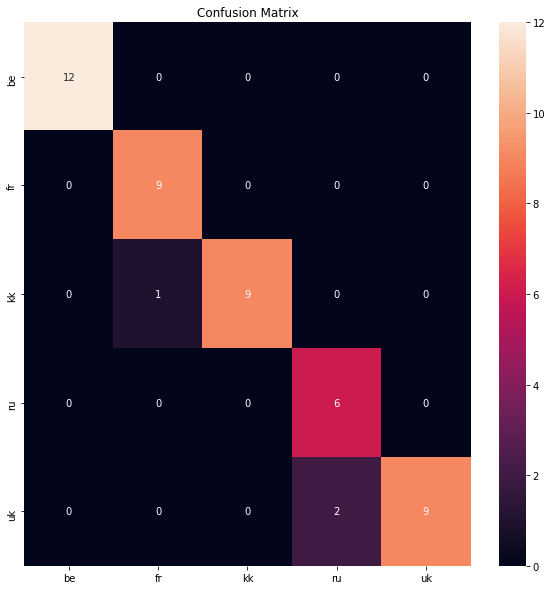

In [46]:
test_classify(y_test, y_predicted, clf.classes_)

              precision    recall  f1-score   support

          be       1.00      0.50      0.67        12
          fr       0.75      1.00      0.86         9
          kk       0.83      0.50      0.62        10
          ru       0.27      1.00      0.43         6
          uk       0.50      0.09      0.15        11

    accuracy                           0.56        48
   macro avg       0.67      0.62      0.55        48
weighted avg       0.71      0.56      0.55        48



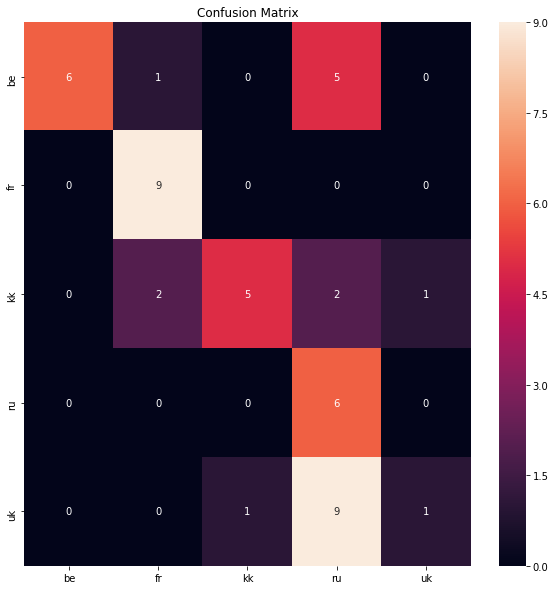

In [47]:
# Проверим на случайных отрывках из тестовых текстов
import random

small_texts = []
for text in X_test:
    begin = random.randint(0, len(text) - 10)
    small_texts.append(text[begin:begin+10])
y_predicted_small = clf.predict(small_texts)
test_classify(y_test, y_predicted_small, clf.classes_)